In [1]:
import pandas as pd
import os
import sys
import seaborn as sns
import re
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import jieba

In [7]:
def summarize_files(file_paths):
    # Read and concatenate all CSV files into one DataFrame
    all_data = []
    for path in file_paths:
        df = pd.read_csv(path)
        df['Source'] = os.path.basename(path)
        all_data.append(df)

    combined_df = pd.concat(all_data, ignore_index=True)

    return combined_df

def get_stats(df):
    sns.histplot(df["class"])

In [8]:
# Load all CSV files
file_paths = [
    "../data/IDP.csv",
    "../data/APM.csv",
    "../data/ISEducation.csv"
]
combined_df = summarize_files(file_paths)

### Keyword Analysis

In [4]:
counter_perclass = []

for cls, group in combined_df.groupby("class"):
    print(f"\n類別 {cls} 的常見關鍵字：")
    
    # 把所有問題合併成一段文字
    all_questions = " ".join(group["question"].astype(str).tolist())
    print(all_questions)
    # 改成使用 jieba 斷詞
    words = jieba.lcut(all_questions)
    words = [w for w in words if len(w) > 1 and re.match(r"[\u4e00-\u9fa5]+", w)]
    counter = Counter(words)
    counter_perclass.append((cls, counter))
    # 顯示前十個高頻詞
    for word, freq in counter.most_common(10):
        print(f"{word}: {freq}")

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache



類別 0 的常見關鍵字：
Q1. 留學代辦能幫我處理什麼？自己辦不行嗎 Q2. 我符合海外留學的申請資格嗎？ Ｑ9.出國留學期間可以打工嗎？ Ｑ10. 為什麼 IDP 可以免費代辦？其他代辦有些要收好幾萬？ Ｑ12. 留學遊學有甚麼差別？哪個適合我？ 留學代辦是什麼？幫你代辦那些項目呢？ 留學代辦服務流程 出國留學該找代辦還是自己申請如何決定？三點幫助你思考 1. 澳洲留學值得嗎？有哪些優勢？ 6. 台灣高中生可以申請澳洲大學嗎？ 3. 澳洲畢業後可以申請工作簽證嗎？ 4. 在澳洲留學畢業後，有移民可能？ 1. 什麼時候開始準備澳洲留學最合適？ 4. 澳洲留學需要找代辦嗎？ 3.什麼是 Pre-Master （英國碩士預科課程）？  ６. 台灣高中生怎麼申請英國大學？高中生銜接英國大學方式有？ 8. 英國畢業生工作簽證 PSW 好申請嗎？英國找工作容易嗎？ 9. 去英國唸書一定要待在大城市嗎？擔心大城市的生活費太高，那麼小城市的生活和交通方便嗎？   11. 可以跨領域申請的英國碩士科系，還是只能申請和我大學主修相關的課程？ 8. 加拿大打工遊學 COOP 是什麼？  為什麼要到海外留學？ How do I check if I can get in before I apply? 誰可以幫助我完成整個留學過程？ 我可以一次申請幾所學校？ 台灣跟美國的學制差別？學生是否可以銜接的上理想課程？ 如果確定有了想出國留學的意願，應該從什麼時候開始準備申請呢？ 高中留學需要的條件？ 你們提供什麼服務？ 可以代辦其他國家嗎？ 為什麼可以免費代辦 不代收學費對我比較有保障嗎？ 需提前多久申請澳洲學校 ？ 學校申請準備清單 申請課程一定要有雅思成績嗎？ 到澳洲留學的學費約多少呢？ 生活費一年需要多少？ 可以貸款去澳洲念書？ 語言課程長度應該如何選擇？ 語言課程的容易直升嗎？ 澳洲英文口音會不會很難懂？ 同學會不會很多說中文的人？ 語言課程可以分期付款嗎？ 課程期間，實習有薪水嗎？ 高中或大學肄業可以直接申請嗎？ 澳洲大學的上課教學模式為何？ 台灣高中畢業生一定要讀foundation才能進大一嗎？ 澳洲碩士學位類型分幾種？ 澳洲碩士學位需要讀多久？ 澳洲碩士課程一定要是學士本科生才能讀嗎？ 畢業後就業率高嗎？ 回台灣前，畢業/成績文件該怎麼認證？ 行李運回台灣，有哪些選擇？ 已

Loading model cost 0.759 seconds.
Prefix dict has been built successfully.


申請: 18
可以: 18
澳洲: 15
留學: 13
出境: 13
什麼: 11
如何: 9
役男: 9
課程: 8
出國: 6

類別 1 的常見關鍵字：
Ｑ4. 出國留學費用跟生活費怎麼算？ Ｑ5. 留學費用好高？有留學獎學金可以申請嗎？ Ｑ6. 在校成績不高，但想申請世界百大名校，有可能嗎？ Q7. 世界排名網站好多，有全球排名、科系排名到底該看哪種排名來選學校呢？   Ｑ8. 留學申請需要多久時間？留學入學時間是什麼時候？ Ｑ11. 留學國家、科系選擇那麼多，我該怎麼選？ 2. 澳洲有哪些主要城市適合留學？ 3. 澳洲有哪些比較有名的大學？  1. 申請澳洲學校的流程是什麼？ 2. 澳洲留學有基本入學門檻嗎？ 3. 澳洲留學英文需要哪些語言證明？ 5. 如果GPA 不夠高還可以申請澳洲學校嗎？ 7. 英文分數不夠高、未達標準還可以申請嗎 8. 什麼是條件式入學許可 Conditional offer？ 1. 澳洲學費大概多少？碩士學費多少錢？ 2. 澳洲生活費高嗎？一個月抓多少？ 3. 澳洲留學可以申請獎學金嗎？ 1. 澳洲留學生可以打工嗎？ 2. 哪些科系有機會畢業後留在澳洲工作？ 2. 怎麼找到適合自己的澳洲學校與科系？ 4. 在校成績 GPA 不高，還有機會申請英國學校嗎？  ５. 大學畢業很久、也工作很久了，還能申請英國碩博士嗎？ 7. 英國留學好像很貴？去英國讀書應該準備多少預算？  12. 聽說英國研究所一年就能畢業，課程內容是不是很「水」啊？ 1. 美國公立和私立大學的差別是？ 2. 如果我的成績不夠好，還有機會申請美國學校嗎？   3. 高中在校成績不好，有機會進入美國頂大就讀嗎？ 4. 美國社區大學是什麼？畢業後可以拿到什麼學位？   5. 美國大學的錄取標準是什麼？   6. 申請美國學校應該考 GRE 還是 GMAT？   7. 美國碩士要讀幾年？ 8. 美國 GPA 怎麼計算？   9. 美國這麼大，該如何選擇學校呢？   10. 美國學士、碩士、博士學位有哪些？   9. 在美國留學，要如何合法打工或工作呢？ 10. 美國 OPT 實習期限是多久？ 1. 加拿大留學費用真的比較便宜嗎？  2. 加拿大提供哪些學位？  3. 加拿大碩士的錄取標準是什麼？  4. 如何挑選加拿大的學校？  5. 雅思沒考好、英文程度不夠還可以申請加拿

In [5]:
keywords_by_stage = {
    "啟蒙": ["留學", "出境", "役男", "課程", "出國"],
    "初期": ["學校", "英文", "成績"],
    "中期": ["準備", "文件"],
    "後期": ["簽證", "工作", "打工", "畢業"],
}
all_keywords = [kw for stage in keywords_by_stage.values() for kw in stage]

# nested dict
keyword_stats = defaultdict(dict)
for cls, counter in counter_perclass:
    for kw in all_keywords:
        keyword_stats[kw][cls] = counter.get(kw, 0)

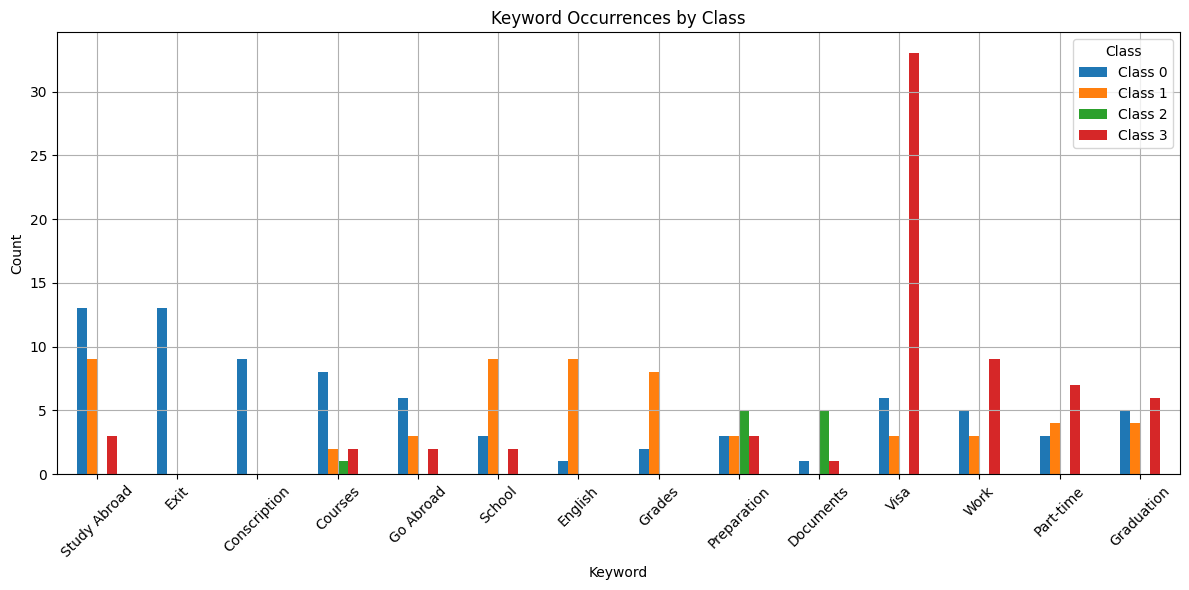

In [6]:
keyword_translation = {
    "留學": "Study Abroad",
    "出境": "Exit",
    "役男": "Conscription",
    "課程": "Courses",
    "出國": "Go Abroad",
    "學校": "School",
    "英文": "English",
    "成績": "Grades",
    "準備": "Preparation",
    "文件": "Documents",
    "簽證": "Visa",
    "工作": "Work",
    "打工": "Part-time",
    "畢業": "Graduation"
}

df = pd.DataFrame(keyword_stats).fillna(0).astype(int).T

df.index = [keyword_translation.get(word, word) for word in df.index]

df.columns = [f"Class {i}" for i in df.columns]

ax = df.plot(kind="bar", figsize=(12, 6))
plt.title("Keyword Occurrences by Class")
plt.ylabel("Count")
plt.xlabel("Keyword")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.legend(title="Class")

plt.show()


### Length Analysis

In [26]:
def plot_len(df, column_name):
    lengths = df[column_name].str.len()
    print(f"max {column_name} length: {lengths.max()} min {column_name} length: {lengths.min()}, avg {column_name} length: {lengths.median()}")
    sns.histplot(lengths)
    plt.title(f"Length Distribution of {column_name}")
    plt.xlabel("Length")
    plt.ylabel("Frequency")
    plt.show()

max question length: 89 min question length: 6, avg question length: 17.0


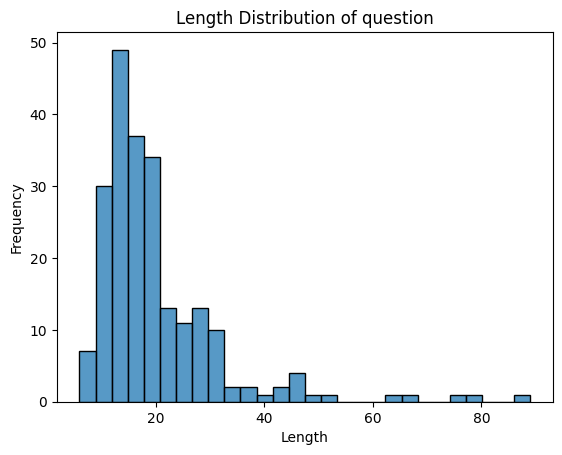

In [27]:
plot_len(combined_df, "question")

max answer length: 964.0 min answer length: 3.0, avg answer length: 102.0


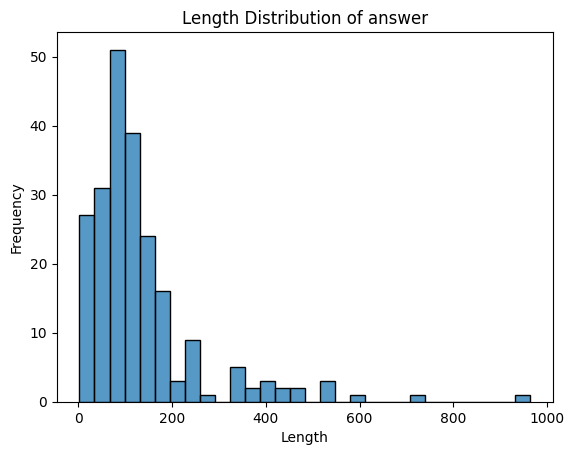

In [28]:
plot_len(combined_df, "answer")